In [1]:
# improt dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
df_main = pd.read_csv('./data/data.csv')

In [3]:
df_main.head()

,Age,WC,EL,Year,MS,Occ,RS,Gender,CG,CL,Hours,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,<=50K


In [4]:
df_main.describe()

,Age,Year,CG,CL,Hours
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
Age       32561 non-null int64
WC        32561 non-null object
EL        32561 non-null object
Year      32561 non-null int64
MS        32561 non-null object
Occ       32561 non-null object
RS        32561 non-null object
Gender    32561 non-null object
CG        32561 non-null int64
CL        32561 non-null int64
Hours     32561 non-null int64
Salary    32561 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


Index(['Age', 'Year', 'CG', 'CL', 'Hours'], dtype='object')


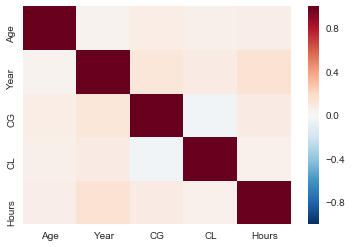

In [6]:
# calculate the correlation matrix
corr = df_main.corr()
print(corr.columns)

# plot the correlation heatmap
sns.heatmap(corr)

In [7]:
df_main.columns

Index(['Age', 'WC', 'EL', 'Year', 'MS', 'Occ', 'RS', 'Gender', 'CG', 'CL',
       'Hours', 'Salary'],
      dtype='object')

In [8]:
for i in df_main['Salary']:
    print("-",i,"-")
    print(str.strip(i))
    print(i.strip() is "<=50K")
    print(i.strip() == "<=50K")
    print((i == "<=50K"))
    break

-  <=50K -
<=50K
False
True
False


In [9]:
df_main['Salary'] = [0 if salary.strip() =="<=50K" else 1 if salary.strip()==">50K" else salary for salary in df_main['Salary']]

In [10]:
# data cleaning
for column in df_main.columns:
    df_main[column] = [value.strip() if type(value) == str else value for value in df_main[column]]

In [11]:
df_main.head(10)

,Age,WC,EL,Year,MS,Occ,RS,Gender,CG,CL,Hours,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,1


In [12]:
wc_enc = preprocessing.LabelEncoder()
X = df_main['WC']
wc_enc.fit(X.values)
df_main['WC'] = wc_enc.transform(df_main['WC'].values)

el_enc = preprocessing.LabelEncoder()
X = df_main['EL']
el_enc.fit(X.values)
df_main['EL'] = el_enc.transform(df_main['EL'].values)

ms_enc = preprocessing.LabelEncoder()
X = df_main['MS']
ms_enc.fit(X.values)
df_main['MS'] = ms_enc.transform(df_main['MS'].values)

occ_enc = preprocessing.LabelEncoder()
X = df_main['Occ']
occ_enc.fit(X.values)
df_main['Occ'] = occ_enc.transform(df_main['Occ'].values)

rs_enc = preprocessing.LabelEncoder()
X = df_main['RS']
rs_enc.fit(X.values)
df_main['RS'] = rs_enc.transform(df_main['RS'].values)

gender_enc = preprocessing.LabelEncoder()
X = df_main['Gender']
gender_enc.fit(X.values)
df_main['Gender'] = gender_enc.transform(df_main['Gender'].values)

In [13]:
df_main.head()

,Age,WC,EL,Year,MS,Occ,RS,Gender,CG,CL,Hours,Salary
0,39,7,9,13,4,1,1,1,2174,0,40,0
1,50,6,9,13,2,4,0,1,0,0,13,0
2,38,4,11,9,0,6,1,1,0,0,40,0
3,53,4,1,7,2,6,0,1,0,0,40,0
4,28,4,9,13,2,10,5,0,0,0,40,0


In [14]:
columns_to_use = ['Age', 'WC', 'EL', 'Year', 'MS', 'Occ', 'RS', 'Gender', 'CG', 'CL', 'Hours']

In [15]:
X = df_main[columns_to_use]
y = df_main['Salary']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)

(21815, 11)
(10746, 11)


In [18]:
def train_with_folds(clf):
    # split array in k(number of folds) sub arrays
    X_folds = np.array_split(X_train, 3)
    y_folds = np.array_split(y_train, 3)
    
    scores = list()
    models = list()
    for k in range(3):

        # We use 'list' to copy, in order to 'pop' later on
        X_train_fold = list(X_folds)
        # pop out kth sub array for testing
        X_test_fold  = X_train_fold.pop(k)
        # concatenate remaining sub arrays for training
        X_train_fold = np.concatenate(X_train_fold)

        # same process for y
        y_train_fold = list(y_folds)
        y_test_fold  = y_train_fold.pop(k)
        y_train_fold = np.concatenate(y_train_fold)

        clf = clf.fit(X_train_fold, y_train_fold)
        scores.append(clf.score(X_test_fold, y_test_fold))
        models.append(clf)

    print(scores)

### Gaussian naive bayes

In [19]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print("mean accuracy ",gnb.score(X_test, y_test))

mean accuracy  0.8058812581425647


In [20]:
train_with_folds(clf=GaussianNB())

[0.7962046204620462, 0.8001925192519251, 0.7997524412047862]


### Decision tree classifier

In [21]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
print("mean accuracy ", clf.score(X_test, y_test))

mean accuracy  0.8514796203238414


In [22]:
clf = DecisionTreeClassifier(max_depth=10)
train_with_folds(clf)

[0.8481848184818482, 0.8507975797579758, 0.8484390042635126]


### Multilayer perceptrons

In [23]:
clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(15, 5), random_state=43)
clf = clf.fit(X_train, y_train)
print("mean accuracy ", clf.score(X_test, y_test))

mean accuracy  0.834356970035362


In [24]:
clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=43)
train_with_folds(clf)

[0.8194444444444444, 0.8147689768976898, 0.7754091596754229]
